In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('police_project.csv')

In [3]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.shape

(91741, 15)

In [5]:
df.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [6]:
df = df.drop(columns = ['county_name'])

In [7]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [8]:
df.dropna(axis=1, how='all').shape


(91741, 14)

<AxesSubplot:>

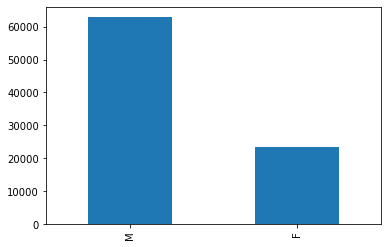

In [9]:
df['driver_gender'].value_counts().plot.bar()

In [10]:
print(df[df.violation == 'Speeding'].driver_gender.value_counts(normalize = True))

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64


<AxesSubplot:>

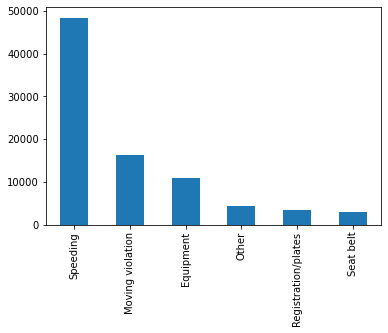

In [11]:
df['violation'].value_counts().plot.bar()

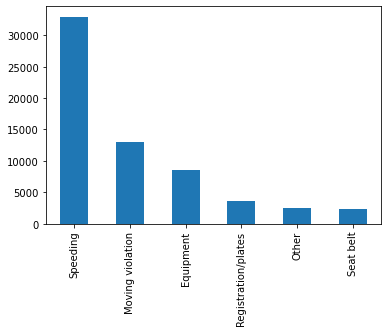

In [12]:
men = df.loc[df['driver_gender'] == 'M'  , 'violation'].value_counts().plot.bar()

women = df.loc[df['driver_gender']=='F', 'violation'].value_counts().plot.bar()



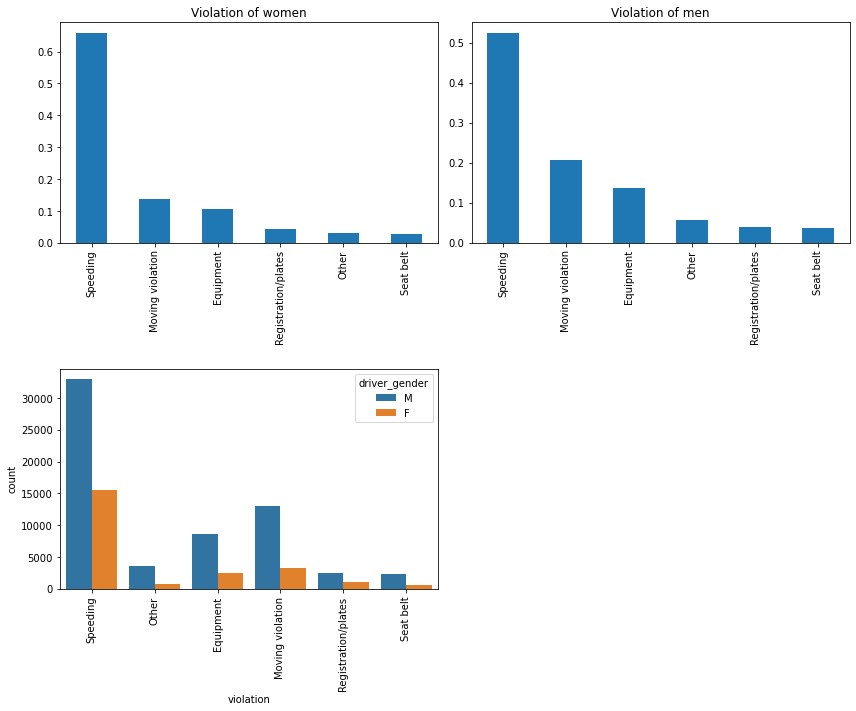

In [13]:
plt.figure(figsize = (12 , 18))

plt.subplot( 4,2,1)

df[df.driver_gender == 'F'].violation.value_counts(normalize = True).plot(kind = 'bar')

plt.title('Violation of women')

plt.subplot( 4,2,2)

df[df.driver_gender == 'M'].violation.value_counts(normalize = True).plot(kind = 'bar')
plt.title('Violation of men')

plt.subplot(4,2,3)

sns.countplot(x = 'violation',data = df,hue = 'driver_gender')
plt.xticks(rotation = 90)

plt.tight_layout()





In [14]:
df.columns


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [15]:
df['search_conducted'].value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [16]:
df.loc[df.search_conducted, 'driver_gender'].value_counts()


M    2725
F     471
Name: driver_gender, dtype: int64

In [17]:
df.groupby(['violation' , 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [18]:
df[df.search_conducted == False].search_type.value_counts(dropna=False)


NaN    88545
Name: search_type, dtype: int64

In [19]:
df['search_type'].value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonab

In [20]:
from collections import Counter

sf = df['search_type'].dropna()


In [21]:
search_count = Counter()
for search in sf.str.split(','):
    search_count.update(search)

In [22]:
dict(search_count)

{'Incident to Arrest': 1566,
 'Protective Frisk': 274,
 'Probable Cause': 1182,
 'Reasonable Suspicion': 314,
 'Inventory': 439}

<AxesSubplot:xlabel='Search Type'>

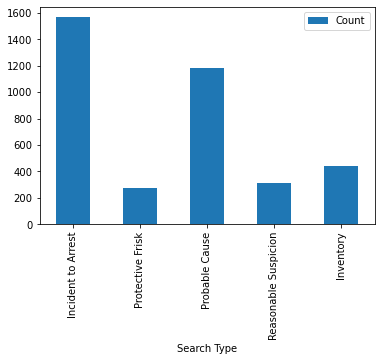

In [23]:
search_count_dict = dict(search_count)
pd.DataFrame(search_count_dict.items(), columns=['Search Type', 'Count']).plot.bar(x='Search Type', y='Count')

In [24]:
df['search_type'].str.contains('Protective Frisk').sum()

274

In [25]:
df['search_type'].str.contains('Protective Frisk').mean()

0.08573216520650813

## by time crime analysis

In [26]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [27]:
df['stop_date']

0        2005-01-02
1        2005-01-18
2        2005-01-23
3        2005-02-20
4        2005-03-14
            ...    
91736    2015-12-31
91737    2015-12-31
91738    2015-12-31
91739    2015-12-31
91740    2015-12-31
Name: stop_date, Length: 91741, dtype: object

In [28]:
df['stop_date'] = pd.to_datetime(df.stop_date, format="%Y-%M-%d")
df['year'] = df.stop_date.dt.year

In [29]:
df.dtypes

stop_date             datetime64[ns]
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
year                           int64
dtype: object

In [30]:
df['year'].value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: year, dtype: int64

In [31]:
df["stop_time"] = pd.to_datetime(df.stop_time, format="%H:%M").dt.hour


In [32]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,2005-01-02 00:01:00,1,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18 00:01:00,8,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23 00:01:00,23,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-01-20 00:02:00,17,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-01-14 00:03:00,10,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [33]:
df.loc[df.sort_values(by = 'stop_time').drugs_related_stop, 'stop_time'].value_counts(ascending=False)

0     103
23     92
1      60
13     50
22     47
2      46
14     44
9      43
10     42
11     41
15     31
19     30
20     27
18     22
16     22
21     20
3      20
12     16
17     16
7      15
8      14
6      10
4       3
5       1
Name: stop_time, dtype: int64

<AxesSubplot:>

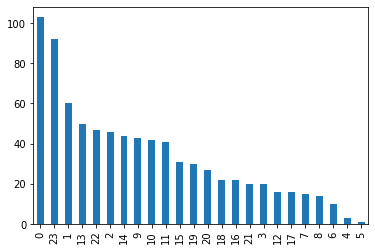

In [34]:
df.loc[df.sort_values(by = 'stop_time').drugs_related_stop, 'stop_time'].value_counts().plot.bar()

In [43]:
df['stop_duration'].isnull().sum()

5333

In [48]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'year'],
      dtype='object')

In [45]:
df['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan, '2', '1'], dtype=object)

In [51]:
df.groupby('stop_duration')['violation_raw'].value_counts()

stop_duration  violation_raw                   
0-15 Min       Speeding                            41014
               Other Traffic Violation             11763
               Equipment/Inspection Violation       9173
               Seatbelt Violation                   2665
               Registration Violation               2421
               Special Detail/Directed Patrol       1622
               Call for Service                      547
               Violation of City/Town Ordinance      144
               Motorist Assist/Courtesy              119
               APB                                    37
               Suspicious Person                      32
               Warrant                                 6
1              Speeding                                1
16-30 Min      Speeding                             6848
               Other Traffic Violation              3150
               Equipment/Inspection Violation       1373
               Registration Violation   

In [53]:
mapping = {'0-15 Min':8 , '16-30 Min':23 , '30+ Min ':45}
df['stop_minute'] = df['stop_duration'].map(mapping)

In [54]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,stop_minute
0,2005-01-02 00:01:00,1,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,8.0
1,2005-01-18 00:01:00,8,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,8.0
2,2005-01-23 00:01:00,23,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,8.0
3,2005-01-20 00:02:00,17,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005,23.0
4,2005-01-14 00:03:00,10,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,8.0


In [55]:
df.groupby('violation_raw')['stop_minute'].mean()

violation_raw
APB                                 13.901639
Call for Service                    14.644603
Equipment/Inspection Violation       9.952873
Motorist Assist/Courtesy            12.971910
Other Traffic Violation             11.168377
Registration Violation              11.739535
Seatbelt Violation                   9.281743
Special Detail/Directed Patrol      12.114094
Speeding                            10.146170
Suspicious Person                   12.333333
Violation of City/Town Ordinance    12.463415
Warrant                             15.500000
Name: stop_minute, dtype: float64

In [56]:
df.groupby('violation_raw')['stop_minute'].agg(['mean','count'])

,mean,count
violation_raw,,
APB,13.901639,61
Call for Service,14.644603,982
Equipment/Inspection Violation,9.952873,10546
Motorist Assist/Courtesy,12.971910,178
Other Traffic Violation,11.168377,14913
Registration Violation,11.739535,3225
Seatbelt Violation,9.281743,2914
Special Detail/Directed Patrol,12.114094,2235
Speeding,10.146170,47862


<AxesSubplot:ylabel='Density'>

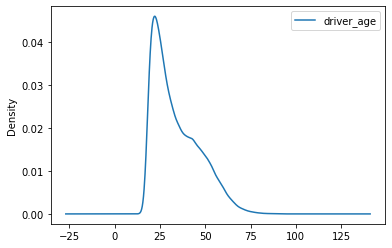

In [59]:
df.plot.kde(y = 'driver_age')